# Phase 4 Final Project Submission

* Student name: Heath Rittler
* Student pace: Self paced
* Scheduled project review date/time: tbd
* Instructor name: Mark Barbour
* Blog post URL: https://medium.com/@heathlikethecandybar

# Introduction

## Business Case/ Summary

**Our task is to:**

Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.

## Modelling and Approach

There are two common recommendation filtering techniques: collaborative filtering and content filtering.

* `Collaborative filtering` requires the model to learn the connections/similarity between users so that it can generate the best recommendation options based on users’ previous choices, or ratings. 
* `Content filtering` needs the profile of both the users and the items so that the system can determine the recommendation according to the common properties of the users and respective items.

## Metrics for Evaluation

### **Evaluation**

The MovieLens dataset has explicit ratings, so achieving some sort of evaluation of your model is simple enough. But you should give some thought to the question of metrics. Since the rankings are ordinal, we know we can treat this like a regression problem. But when it comes to regression metrics there are several choices: RMSE, MAE, etc. Here are some further ideas.

## Core Field Names and Definitions from Data Source

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files 
* `links.csv`
* `movies.csv` 
* `ratings.csv` 
* `tags.csv`

### `Formatting and Encoding`
The dataset files are written as comma-separated values files with a single header row. Columns that contain commas (,) are escaped using double-quotes ("). These files are encoded as UTF-8. If accented characters in movie titles or tag values (e.g. Misérables, Les (1995)) display incorrectly, make sure that any program reading the data, such as a text editor, terminal, or script, is configured for UTF-8.

**`User Ids`**
MovieLens users were selected at random for inclusion. Their ids have been anonymized. User ids are consistent between ratings.csv and tags.csv (i.e., the same id refers to the same user across the two files).

**`Movie Ids`**
Only movies with at least one rating or tag are included in the dataset. These movie ids are consistent with those used on the MovieLens web site (e.g., id 1 corresponds to the URL https://movielens.org/movies/1). Movie ids are consistent between ratings.csv, tags.csv, movies.csv, and links.csv (i.e., the same id refers to the same movie across these four data files).

### `Ratings Data File Structure (ratings.csv)`
All ratings are contained in the file ratings.csv. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

userId,movieId,rating,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### `Tags Data File Structure (tags.csv)`
All tags are contained in the file tags.csv. Each line of this file after the header row represents one tag applied to one movie by one user, and has the following format:

userId,movieId,tag,timestamp
The lines within this file are ordered first by userId, then, within user, by movieId.

Tags are user-generated metadata about movies. Each tag is typically a single word or short phrase. The meaning, value, and purpose of a particular tag is determined by each user.

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

### `Movies Data File Structure (movies.csv)`
Movie information is contained in the file movies.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,title,genres
Movie titles are entered manually or imported from https://www.themoviedb.org/, and include the year of release in parentheses. Errors and inconsistencies may exist in these titles.

Genres are a pipe-separated list, and are selected from the following:

Action
Adventure
Animation
Children's
Comedy
Crime
Documentary
Drama
Fantasy
Film-Noir
Horror
Musical
Mystery
Romance
Sci-Fi
Thriller
War
Western
(no genres listed)

### `Links Data File Structure (links.csv)`
Identifiers that can be used to link to other sources of movie data are contained in the file links.csv. Each line of this file after the header row represents one movie, and has the following format:

movieId,imdbId,tmdbId
movieId is an identifier for movies used by https://movielens.org. E.g., the movie Toy Story has the link https://movielens.org/movies/1.

imdbId is an identifier for movies used by http://www.imdb.com. E.g., the movie Toy Story has the link http://www.imdb.com/title/tt0114709/.

tmdbId is an identifier for movies used by https://www.themoviedb.org. E.g., the movie Toy Story has the link https://www.themoviedb.org/movie/862.

Use of the resources listed above is subject to the terms of each provider.

# Data Load, Cleaning

## Importing Packages

In [212]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime
from matplotlib.colors import ListedColormap
import matplotlib.ticker as mtick


from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

## Choosing Colors & Templates

In [108]:


# Choosing standard colors for project

pal = sns.color_palette("coolwarm_r")

color_codes = ['red', 'peach', 'tan', 'gray', 'lightblue', 'blue']

my_cmap = ListedColormap(sns.color_palette(pal).as_hex())

pal.as_hex()

['#e26952', '#f7a889', '#edd1c2', '#c9d7f0', '#9abbff', '#6788ee']

## Import Data

### Ratings

In [109]:
# import ratings data file
ratings = pd.read_csv('ml-latest-small/ratings.csv')

In [110]:
# view the first 5 rows
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [111]:
# view data types record counts
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [112]:
# check for missing values within any columns
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

### Tags

In [113]:
# import ratings data file
tags = pd.read_csv('ml-latest-small/tags.csv')

In [114]:
# view the first 5 rows
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [115]:
# view data types record counts
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [116]:
# check for missing values within any columns
tags.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

### Movies

In [117]:
# import ratings data file
movies = pd.read_csv('ml-latest-small/movies.csv')

In [118]:
# view the first 5 rows
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [119]:
# view data types record counts
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [120]:
# check for missing values within any columns
movies.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [121]:
# split out genres
movie_genres = movies.genres.str.split("|", expand = True).add_prefix('genre_')
movie_genres.head()

,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,Comedy,Romance,None,None,None,None,None,None,None,None
3,Comedy,Drama,Romance,None,None,None,None,None,None,None
4,Comedy,None,None,None,None,None,None,None,None,None


In [122]:
# concat df back together
movies_2 = pd.concat([movies, movie_genres], axis=1)

# drop old genres column
movies_2.drop('genres', axis=1, inplace=True)

In [123]:
# view first 5 rows
movies_2.head()

,movieId,title,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7,genre_8,genre_9
0,1,Toy Story (1995),Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,2,Jumanji (1995),Adventure,Children,Fantasy,None,None,None,None,None,None,None
2,3,Grumpier Old Men (1995),Comedy,Romance,None,None,None,None,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy,Drama,Romance,None,None,None,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,None,None,None,None,None,None,None,None,None


This looks great, however, I don't like how a single genre column could have more than one value.  It is hard for us to tell which are westerns as we would need to traverse multiple columns.  I am going to create now single columns for each genre, and a boolean flag so we can tell at a glance the movies and genre distributions.

In [124]:
# viewing the first column of genres to start splitting out into our denormalized data frame
movies_2['genre_0'].value_counts()

Comedy                2779
Drama                 2226
Action                1828
Adventure              653
Crime                  537
Horror                 468
Documentary            386
Animation              298
Children               197
Thriller                84
Sci-Fi                  62
Mystery                 48
Fantasy                 42
Romance                 38
(no genres listed)      34
Western                 23
Musical                 23
Film-Noir               12
War                      4
Name: genre_0, dtype: int64

In [125]:
movies_denormal = movies

In [126]:
# comedies
movies_denormal['Comedy'] = movies['genres'].str.contains("Comedy", case=False)

In [127]:
# drama
movies_denormal['Drama'] = movies['genres'].str.contains("Drama", case=False)

In [128]:
# action
movies_denormal['Action'] = movies['genres'].str.contains("Action", case=False)

In [129]:
# adventure
movies_denormal['Adventure'] = movies['genres'].str.contains("Adventure", case=False)

In [130]:
# crime
movies_denormal['Crime'] = movies['genres'].str.contains("Crime", case=False)

In [131]:
# horror
movies_denormal['Horror'] = movies['genres'].str.contains("Horror", case=False)

In [132]:
# documentary
movies_denormal['Documentary'] = movies['genres'].str.contains("Documentary", case=False)

In [133]:
# animation
movies_denormal['Animation'] = movies['genres'].str.contains("Animation", case=False)

In [134]:
# children
movies_denormal['Children'] = movies['genres'].str.contains("Children", case=False)

In [135]:
# thriller
movies_denormal['Thriller'] = movies['genres'].str.contains("Thriller", case=False)

In [136]:
# sci-fi
movies_denormal['Sci_Fi'] = movies['genres'].str.contains("Sci-Fi", case=False)

In [137]:
# mystery
movies_denormal['Mystery'] = movies['genres'].str.contains("Mystery", case=False)

In [138]:
# fantasy
movies_denormal['Fantasy'] = movies['genres'].str.contains("Fantasy", case=False)

In [139]:
# romance
movies_denormal['Romance'] = movies['genres'].str.contains("Romance", case=False)

In [140]:
# (no genres listed)
movies_denormal['(no genres listed)'] = movies['genres'].str.contains("(no genres listed)", case=False)

/Users/heathrittler/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [141]:
# western
movies_denormal['Western'] = movies['genres'].str.contains("Western", case=False)

In [142]:
# musical
movies_denormal['Musical'] = movies['genres'].str.contains("Musical", case=False)

In [143]:
# rilm-noir
movies_denormal['Film-Noir'] = movies['genres'].str.contains("Film-Noir", case=False)

In [144]:
# war
movies_denormal['War'] = movies['genres'].str.contains("War", case=False)

In [145]:
# now let's remove our string/ concatenated genres column
movies_denormal.drop('genres', axis=1)

,movieId,title,Comedy,Drama,Action,Adventure,Crime,Horror,Documentary,Animation,...,Thriller,Sci_Fi,Mystery,Fantasy,Romance,(no genres listed),Western,Musical,Film-Noir,War
0,1,Toy Story (1995),True,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,2,Jumanji (1995),False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,4,Waiting to Exhale (1995),True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,5,Father of the Bride Part II (1995),True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),True,False,True,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9738,193583,No Game No Life: Zero (2017),True,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
9739,193585,Flint (2017),False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9740,193587,Bungo Stray Dogs: Dead Apple (2018),False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


This now looks much better and will be easier to work with as we move forward with our EDA.  Worst case scenario, we transform back into one of the previous versions with movies, or movies2 datasets.  Now going to move on to further denomalize our data set by joining the other files onto a single data frame.

### Join datasets together

In [146]:
# joining movies onto tags
denormal = pd.merge(
    movies,
    ratings,
    how="left",
    on='movieId'
)

denormal.head()


,movieId,title,genres,Comedy,Drama,Action,Adventure,Crime,Horror,Documentary,...,Fantasy,Romance,(no genres listed),Western,Musical,Film-Noir,War,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,1.0,4.0,9.649827e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,5.0,4.0,8.474350e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,7.0,4.5,1.106636e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,15.0,2.5,1.510578e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,True,False,False,True,False,False,False,...,True,False,False,False,False,False,False,17.0,4.5,1.305696e+09


In [147]:
# joining movies onto tags

denormal = pd.merge(
    tags,
    movies,
    how="left",
    on='movieId'
)

denormal.head()


,userId,movieId,tag,timestamp,title,genres,Comedy,Drama,Action,Adventure,...,Thriller,Sci_Fi,Mystery,Fantasy,Romance,(no genres listed),Western,Musical,Film-Noir,War
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2,89774,Boxing story,1445715207,Warrior (2011),Drama,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2,89774,MMA,1445715200,Warrior (2011),Drama,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


# Exploratory Data Analysis

* How many movies? x 
* How many users? x 
* How many ratings? x 
* How many ratings per user? per movie?
* How many ratings by year?
* How many movies by genre? How many ratings per genre? Average rating per genre?
* Highest rated movies?  Lowest rated movies?
* Distribution of ratings?
* Tags word cloud?


In [148]:
ratings.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [149]:
# of distinct movies/ movieIds

movie_count = str(ratings['movieId'].nunique())

print("The data set contains " + movie_count + " distinct movies with at least 1 rating.")

The data set contains 9724 distinct movies with at least 1 rating.


In [150]:
# of distinct users/ userIds

user_count = str(ratings['userId'].nunique())

print("The data set contains " + user_count + " distinct users with at least 1 rating.")

The data set contains 610 distinct users with at least 1 rating.


In [151]:
# of ratings

review_count = str(ratings['userId'].count())

print("The data set contains " + review_count + " ratings.")

The data set contains 100836 ratings.


In [152]:
# average and median reviews

avg_review = str(round(ratings.rating.mean(),2))
med_review = str(round(ratings.rating.median(),2))

print("The average review for all movies is " 
      + avg_review 
      + ", and the median review for all movies is " 
      + med_review 
      + ".")

The average review for all movies is 3.5, and the median review for all movies is 3.5.


''

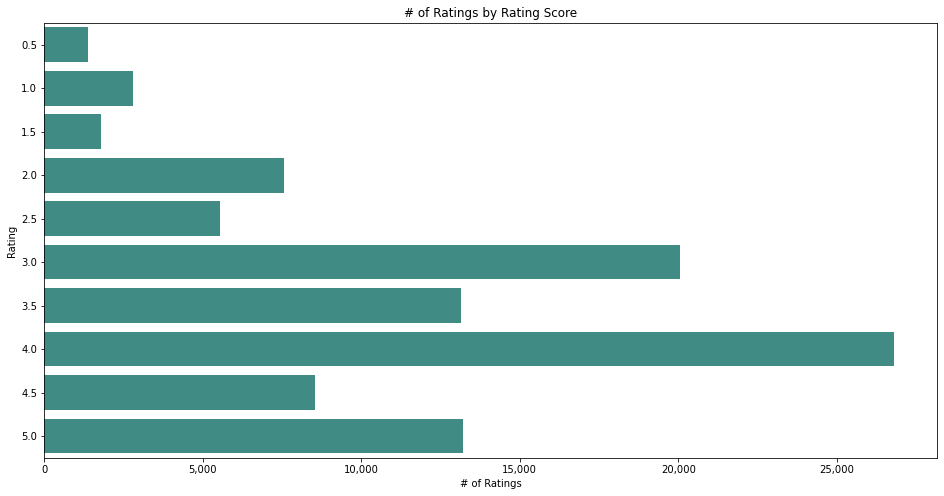

In [225]:
# show total number of ratings by rating score

fig, ax = plt.subplots(figsize=(16,8))

ax.set_title('# of Ratings by Rating Score')


bp = sns.countplot(data=ratings, 
            y='rating', 
            color='#35978f'
            )

bp.set_ylabel('Rating')
bp.set_xlabel('# of Ratings')
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.xaxis.set_major_formatter(tick)
;

In [196]:
# adjusting datetime epoch to a date so we can plot ratings over time

ratings['year'] = pd.to_datetime(ratings['timestamp'], unit='s').dt.year

In [197]:
# dropping our timestamp column as we really don't need it

ratings.drop('timestamp', axis=1)

,userId,movieId,rating,date,year
0,1,1,4.0,2000-07-30,2000
1,1,3,4.0,2000-07-30,2000
2,1,6,4.0,2000-07-30,2000
3,1,47,5.0,2000-07-30,2000
4,1,50,5.0,2000-07-30,2000
...,...,...,...,...,...
100831,610,166534,4.0,2017-05-03,2017
100832,610,168248,5.0,2017-05-03,2017
100833,610,168250,5.0,2017-05-08,2017
100834,610,168252,5.0,2017-05-03,2017


In [210]:
ratings_yr_chrt = (
    ratings
    .groupby('year')['rating']
    .mean()
    .reset_index()
    )

counts = (
    ratings
    .groupby('year')['rating']
    .count()
    .reset_index()
    )


result = pd.merge(ratings_yr_chrt, counts, how="inner", on=['year', 'year'])
result

,year,rating_x,rating_y
0,1996,3.535927,6040
1,1997,3.727557,1916
2,1998,3.435897,507
3,1999,3.772448,2439
4,2000,3.392506,10061
5,2001,3.512239,3922
6,2002,3.606958,3478
7,2003,3.499377,4014
8,2004,3.506099,3279
9,2005,3.431533,5813


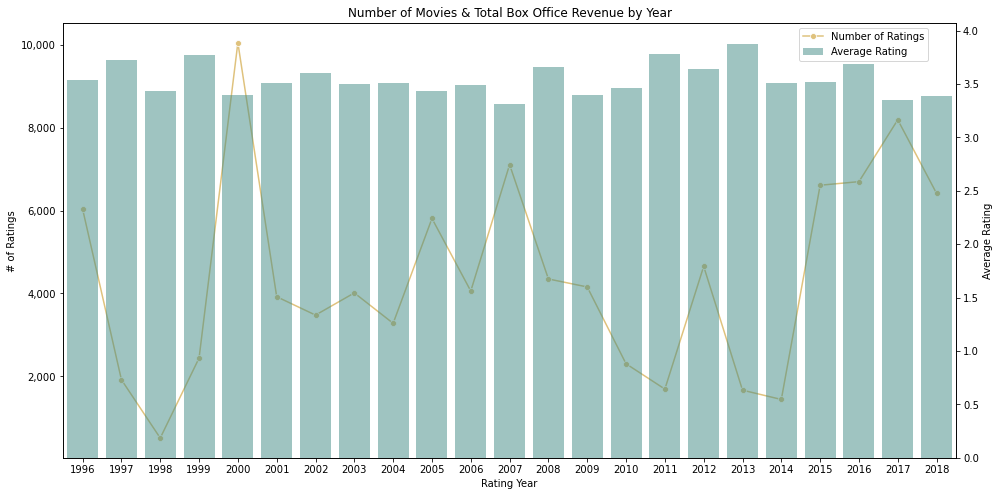

In [226]:
# Summary chart for number of ratings and average rating by rating year

fig, ax1 = plt.subplots(figsize=(16,8))

lp = sns.lineplot(data = result['rating_y'], 
                  marker='o', 
                  sort = False, 
                  ax=ax1, 
                  label='Number of Ratings', 
                  color='#dfc27d')

ax2 = ax1.twinx()

bp = sns.barplot(data = result, 
                 x='year', 
                 y='rating_x', 
                 alpha=0.5, 
                 ax=ax2, 
                 color='#35978f', 
                 label='Average Rating')

ax1.set_title('Number of Movies & Total Box Office Revenue by Year')
ax1.set_xlabel('Rating Year')
ax1.set_ylabel('# of Ratings')
ax2.set_ylabel('Average Rating')
fig.legend(loc='upper right', bbox_to_anchor=(.88,.88))
ax1.get_legend().remove()
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax1.yaxis.set_major_formatter(tick);

In [278]:
# displaying average ratings by movieId

ratings_movie_chrt = (
    ratings
    .groupby('movieId')['rating']
    .mean()
    .reset_index()
    ).sort_values(by='rating')

ratings_movie_chrt

,movieId,rating
5541,26696,0.5
2685,3604,0.5
4872,7312,0.5
9099,145724,0.5
7280,76030,0.5
...,...,...
2876,3851,5.0
8734,128087,5.0
5862,33138,5.0
7960,96608,5.0


In [286]:
ratings_movies = ratings_movie_chrt.merge(movies, left_on='movieId', right_on='movieId')
ratings_movies

,movieId,rating,title,genres,Comedy,Drama,Action,Adventure,Crime,Horror,...,Thriller,Sci_Fi,Mystery,Fantasy,Romance,(no genres listed),Western,Musical,Film-Noir,War
0,26696,0.5,Lionheart (1990),Action,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,3604,0.5,Gypsy (1962),Musical,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,7312,0.5,"Follow Me, Boys! (1966)",Comedy|Drama,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,145724,0.5,Idaho Transfer (1973),Sci-Fi,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,76030,0.5,Case 39 (2009),Horror|Thriller,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9719,3851,5.0,I'm the One That I Want (2000),Comedy,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9720,128087,5.0,Trinity and Sartana Are Coming (1972),Comedy|Western,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
9721,33138,5.0,Palindromes (2004),Adventure|Comedy|Drama,True,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9722,96608,5.0,Runaway Brain (1995),Animation|Comedy|Sci-Fi,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [279]:
# displaying average rating by userId
ratings_user_chrt = (
    ratings
    .groupby('userId')['rating']
    .mean()
    .reset_index()
    )

ratings_user_chrt

,userId,rating
0,1,4.366379
1,2,3.948276
2,3,2.435897
3,4,3.555556
4,5,3.636364
...,...,...
605,606,3.657399
606,607,3.786096
607,608,3.134176
608,609,3.270270


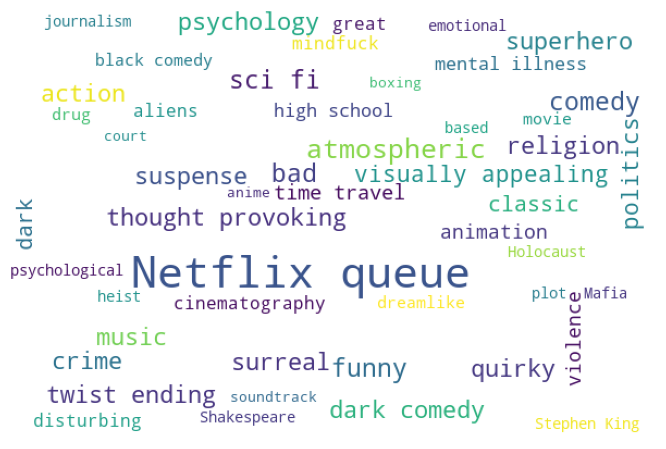

In [265]:
# creating a word cloud for the tags that were created as a part of the review process.

from wordcloud import WordCloud

# Read the whole text.
text = tags['tag']

# Generate a word cloud image
wordcloud = WordCloud().generate(' '.join(tags['tag']))

# take relative word frequencies into account, lower max_font_size
wordcloud = WordCloud(background_color="white",max_words=50,max_font_size=40, relative_scaling=.5,width=600, height=400).generate(' '.join(tags['tag']))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
* How many movies? x 
* How many users? x 
* How many ratings? x 
* How many ratings per user? per movie?
* How many ratings by year? x 
* How many movies by genre? How many ratings per genre? Average rating per genre?
* Highest rated movies?  Lowest rated movies?
* Distribution of ratings? x
* Tags word cloud? x


# Model Testing

In [45]:
from surprise import accuracy, Dataset, SVD, SVDpp, KNNBasic, NMF, CoClustering, SlopeOne, NormalPredictor, Reader
from surprise.model_selection import train_test_split, GridSearchCV, cross_validate
from surprise.model_selection import GridSearchCV

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [47]:
algo_1 = SVD()
algo_2 = KNNBasic()
algo_3 = NMF()
algo_4 = CoClustering()
algo_5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo_1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo_2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo_3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo_4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo_5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


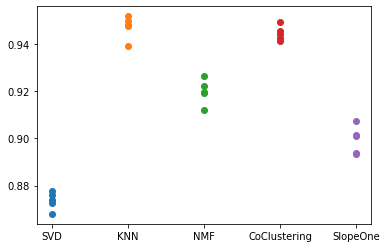

In [48]:

import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')

In [49]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [50]:
trainset = data.build_full_trainset()
algo1.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo1.test(testset)

top_n = get_top_n(predictions, n=3)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 [318, 48516, 58559, 720, 898, 899, 904, 1199, 1225, 1288]
2 [260, 1250, 2959, 750, 1262, 1204, 1136, 1249, 6787, 1233]
3 [54001, 4993, 3639, 1217, 1261, 6016, 4002, 6, 91529, 5952]
4 [1233, 115617, 951, 2677, 4993, 356, 54190, 58559, 3836, 1387]
5 [1204, 1104, 951, 48516, 96821, 1136, 68237, 541, 1225, 6711]
6 [898, 1196, 1270, 1225, 1197, 4306, 44195, 1210, 112552, 750]
7 [2959, 1197, 475, 2571, 1249, 527, 7361, 1247, 81834, 1307]
8 [1204, 1210, 475, 1199, 2571, 2160, 1198, 1196, 858, 260]
9 [260, 912, 541, 1196, 1104, 3451, 1233, 1204, 1213, 858]
10 [898, 3147, 2804, 3451, 3836, 223, 1193, 3037, 951, 1259]
11 [2571, 50, 1198, 1197, 527, 3147, 912, 1213, 3451, 930]
12 [356, 1136, 1198, 1208, 1213, 1617, 2542, 318, 112552, 720]
13 [318, 527, 904, 2959, 1089, 3275, 296, 1203, 750, 589]
14 [750, 3275, 1206, 1225, 4973, 1276, 912, 1204, 6016, 1217]
15 [3451, 593, 1704, 750, 1204, 951, 4848, 44195, 1104, 916]
16 [1233, 898, 908, 1204, 922, 1262, 1086, 1235, 7090, 142488]
17 [1204, 56782,

In [51]:
from surprise import accuracy, Dataset, SVD
from surprise.model_selection import train_test_split

# Load the movielens-100k dataset (download it if needed),
data = Dataset.load_builtin("ml-100k")

# sample random trainset and testset
# test set is made of 25% of the ratings.
trainset, testset = train_test_split(data, test_size=0.25)

# We'll use the famous SVD algorithm.
algo = SVD()

# Train the algorithm on the trainset, and predict ratings for the testset
algo.fit(trainset)
predictions = algo.test(testset)

# Then compute RMSE
accuracy.rmse(predictions)

Dataset ml-100k could not be found. Do you want to download it? [Y/n] n
Ok then, I'm out!


SystemExit: 

/Users/heathrittler/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
